In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib nbagg

Ths using matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc

size of figure needs to be set to the phsyical width on the page in order to make the real text size correspond to the figure size

saving in pdf allows vector graphics and fast performance within pdflatex

In [2]:
mpl.matplotlib_fname()
mpl.rcParams['text.usetex'] = True

## Make fake data

In [3]:
Ts = np.linspace(20, 100, 5)
x = np.linspace(-1, 10, 10)
ys = [np.exp(-(x-2)/3) + np.random.rand(x.size)*0.01 for T in Ts]

X, Y = np.meshgrid(x,x)
M = np.exp(-np.sqrt((X-2)**2 + (Y-3)**2))
M += np.random.rand(*M.shape)*0.1

## Create a set of colors

In [4]:
colors = mpl.cm.inferno(np.linspace(0, 1, len(ys)))
markers = cycle(['^', 'v', '<', '>'])

<IPython.core.display.Javascript object>


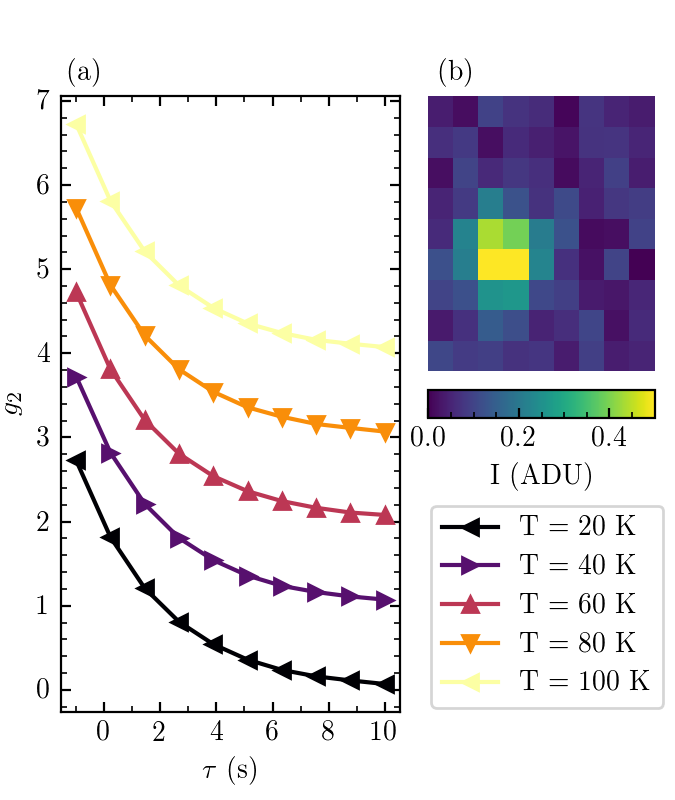

In [7]:
fig = plt.figure(figsize=(3+3/8, 4))

gs = GridSpec(3,2, width_ratios=[1.2,0.8], height_ratios=[1,0.1,1])

ax0 = plt.subplot(gs[:,0])

offsets = np.arange(len(Ts)) * 1
for y, T, offset, color, marker in zip(ys, Ts, offsets, colors, markers):
    ax0.plot(x, y + offset, color=color, marker=marker, label="T = {:.0f} K".format(T))
    
ax0.set_xlabel(r'$\tau$ (s)', usetex=True)
ax0.set_ylabel(r'$g_2$')

ax0.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax0.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax1 = plt.subplot(gs[0,1])
art = ax1.pcolor(X, Y, M, vmin=0, vmax=0.5)
ax1.set_axis_off()
ax1.xaxis.set_minor_locator(ticker.MaxNLocator(0.5))

fig.subplots_adjust(hspace=0.2, wspace=0.3)

ax2 = plt.subplot(gs[1,1])
cb = plt.colorbar(art, cax=ax2, orientation="horizontal")
cb.set_label('I  (ADU)')
cb.set_ticks(ticker.FixedLocator(np.arange(0,0.51,0.2)))


ax3 = plt.subplot(gs[2,1])
handles, labels = ax0.get_legend_handles_labels()
ax3.axis('off')
ax3.legend(handles, labels, bbox_to_anchor=(1.1,0.8))

fig.subplots_adjust(wspace=0.1, hspace=0.1, left=0.09, right=0.97)

fig.text(0.1, 0.9, '(a)')
fig.text(0.65, 0.9, '(b)')

fig.savefig('fig.pdf')